# Lagrange Interpolation

In numerical analysis, Lagrange polynomials are used for polynomial interpolation. For a given set of points $(x_{j},y_{j})$ with no two $x_j$ values equal, the Lagrange polynomial is the polynomial of lowest degree that assumes at each value $x_{j}$ the corresponding value $y_{j}$ (i.e. the functions coincide at each point). 

The complexity of the curve below depends on the order of the curve. A first order curve is a line that can only fit two points, a second order curve will pass through three points, a third order will pass through 4 points, and so on.


In order to create these curves, we must apply lagrange interpolation:

Given a set of $k + 1$ data points

$$
(x_0, y_0), \cdots, (x_j, y_j), \cdots, (x_k, y_k)
$$

where no two $x_j$ are the same, the interpolation polynomial in the Lagrange form is a linear combination

$$
L(x) = \sum_{j = 0}^k y_j \ \ell_j(x)
$$

of Lagrange basis polynomials:

$$
\ell_j(x) = \prod_{\begin{smallmatrix}0\leq m\leq k\\m\neq j\end{smallmatrix}} \frac{x - x_m}{x_j - x_m}
$$

where $0 \le j \le k$. Note how, given the initial assumption that no two $x_j$ are the same, $x_j - x_m \ne 0$, so this expression is always well-defined. The reason pairs $x_i = x_j$ with $y_i \ne y_k$ are not allowed is that no interpolation function $L$ such that $y_i = L(x_i)$ would exist; a function can only get one value for each argument $x_i$. On the other hand, if also $y_i = y_j$, then two those points would actually be one single point. 

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def f(n):
    return 1/(1 + n**2)

In [4]:
def getPoints(f, p, r):
    """
    Gets 'order' evenly-spaced points within the given range.
    Runs it through function f to return 2D array with [xi, yi].

    f - function to return [xi, yi] inside 'data' return.
    p - amount of points to retrieve within given function.
    r - range to retrieve points by; (i.e. [-5, 5])

    Returns:
        x - (list) x coordinates of the points.
        y - (list) y coordinates of the points.
        xy - (list(list)) [x,y] coordinates of the points.
    """
    points = np.linspace(r[0], r[1], num = p).tolist()
    x = []
    y = []
    xy = []
    for i in points:
        x.append(i)
        y.append(f(i))
        xy.append([i, f(i)])

    return x, y, xy

In [5]:
def LagrangeInterpolation(f, o, r):
    """ Lagrange Interpolation

    f - function.
    o - order of interpolation.
    r - range of points.
    
    Returns:
            xyp - [x, y] data points of evenly spaced ponts between 'range'.
            xy - [x, y] data points of the ACTUAL given function (10,000 points).
            xyf - [x, y] data points of function generated with Lagrange.
    """
    def L(u, x, y):
        """ L(x) for Lagrange, given a specific x point & finding y from data.
        
        u - unknwon value to find.
        x - x data points of function output.
        y - y data points of function output.
        
        Order is kept in check by logic (x_n, x_n) == (x_len(x), y_len(x))
        
        Return: Estimated y point.
        """
        result = 0
        for i in range(len(x) or len(y)):
            term = y[i]
            for j in range(len(x)):
                if j != i: term = term * (u - x[j])/(x[i] - x[j])
            result += term

        return result
    
    # X, Y for points.
    xp, yp, _ = getPoints(f, o, [-5, 5]) # Generated Points
    x, y, _ = getPoints(f, 10000, [-5, 5]) # Actual Function Point
    
    # X, Y for interpolated function.
    xf = []
    yf = []
    for i in range(len(x) or len(y)):
        xf.append(x[i])
        yf.append(L(x[i], xp, yp))
        
    xyp = [xp, yp]
    xy = [x, y]
    xyf = [xf, yf]
    
    return xy, xyf, xyp

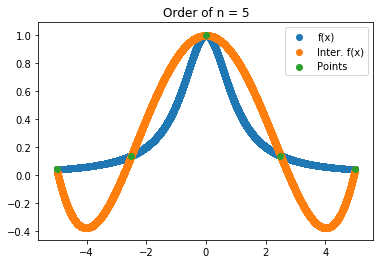

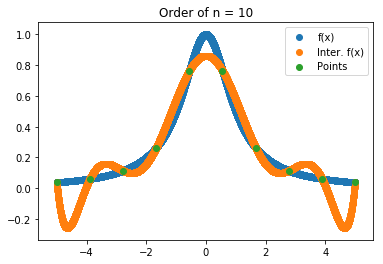

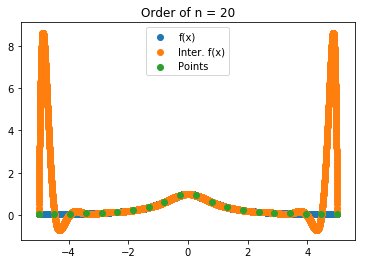

In [6]:
orders = [5, 10, 20]
for o in orders:
    xy, xyf, xyp = LagrangeInterpolation(f, o, [-5, 5])
    a = plt.scatter(xy[0], xy[1]) # actual function.
    i = plt.scatter(xyf[0], xyf[1]) # interpolated function.
    p = plt.scatter(xyp[0], xyp[1]) # points.
    plt.title(f'Order of n = {o}')
    plt.legend((a, i, p), ('f(x)', 'Inter. f(x)', 'Points'))
    plt.show()

## Example

Given the following data points, find the value for $v(16)$.

| $t$ (in seconds) | $v$ (in $\frac{m}{s}$) |
| :--: | :--:| 
| 0 | 0 |
| 10 | 227.04
| 15 | 362.78 |
| 20 | 517.35 |
| 22.5 | 602.97 |
| 30 | 901.67 | 

Chosing the closest point, $15$ and $20$, we need to extract the $v(16)$ from these values. Thus we will conduct a linear interpolation from the given data points.

* $v(15) = 362.78$
* $v(20) = 517.35$

We know that:

$$
v(t) = \sum_{i = 0}^n \ell_i(t) \ v(t_i) \\
v(t) = \sum_{i = 0}^1 \ell_i(t) \ v(t_i) \\
v(t) = \ell_0(t) \ v(t_0) + \ell_1(t) \ v(t_1) \\
v(t) = \ell_0(t)(362.78) + \ell_1(t)(517.35)
$$

And so now we may setup our equation and solve:

$$
\ell_0(t) = \prod_{\begin{smallmatrix}j = 0 \\ j \ne i \end{smallmatrix}} \frac{t - t_j}{t_0 - t_j} \\ 
\ell_0(t) = \frac{t - t_1}{t_0 - t_1}
$$ 

and

$$
\ell_1(t) = \prod_{\begin{smallmatrix}j = 0 \\ j \ne i \end{smallmatrix}} \frac{t - t_j}{t_1 - t_j} \\ 
\ell_1(t) = \frac{t-t_0}{t_1 - t_0}
$$

And we can now substitute this to our original $v(t)$ formula:

$$
v(t) = \frac{t - t_1}{t_0 - t_1}(362.78) + \frac{t-t_0}{t_1 - t_0}(517.35) \\
v(t) = \frac{t - 20}{15 - 20}(362.78) + \frac{t - 15}{20 - 15}(517.35), \text{ with } 15 \le t \le 20
$$

Thus we can now substitute $t$ with $16$ as following:

$$
v(16) = \frac{16 - 20}{15 - 20}(362.78) + \frac{16 - 15}{20 - 15}(517.35) \\
v(16) = 0.8(362.78) + 0.2(517.35) \\
v(16) = 393.69 \ \frac{m}{s}
$$

## Lagrange Polynomial Error Formula

When interpolating a given function $f$ by a polynomial of degree $n$ at the nodes $x_0, \cdots, x_n$ we get the error

$$
E(x, f) = f(x) - p_n(x) = f[x_0, \cdots, x_n, x] \prod_{i = 0}^n (x - x_i)
$$

where $f[x_0, \cdots, x_n, x]$ is the notation for divided differences. 

### Ordinary Differences

#### First Forward Difference

The first forward difference $\Delta f(x_i)$ is defined as 

$$
\Delta f(x_i)  = f(x_{i+1}) - f(x_i)
$$

Then,

$$
f[x_i, x_i+1] = \frac{f(x_{i+1}) - f(x_i)}{x_{i+1} - x_i} = \frac{\Delta f(x_i)}{h}
$$

#### Second Forward Difference

The second forward difference $\Delta^2 f(x_i)$ is defined as 

$$
\Delta^2 f(x_i) = \Delta f(x_{i+1}) - \Delta f(x_i)
$$

The second divided difference expressed in terms of the ordinary difference is

$$
f[x_i, x_{i+1}, x_{i+2}] = \frac{f[x_{i+1}, x_{i+2}] - f[x_{i+1}, x_i]}{x_{i+2} - x_i} \\ = \frac{1}{2h}\left[ \frac{\Delta f(x_{i+1})}{h} - \frac{\Delta f (x_i)}{h}\right] = \frac{\Delta ^2 f(x_i)}{2h^2}
$$

#### $k$th Forward Difference

The $(k+1)$st forward difference $\Delta^{k+1} f(x_i)$ is defined as follows:

$$
\Delta^{k+1} f(x_i) = \Delta ^k f(x_{i+1}) - \Delta^kf(x_i)
$$

In general,

$$
f[x_i, \cdots, x_{i+k}] = \frac{\Delta^k f(x_i)}{k!h^k}
$$
